**Credit Card Fraud Detection System Using Supervised Machine Random Forest**
===
---
**Author:** *Muhammad Wira Widhana [24.55.2717];&nbsp;&nbsp;Yehezkiel Budi Hermawan [24.55.2710];&nbsp;&nbsp;Althof Fauzan Fahmi [24.55.2719]*


### **Tentang Dataset**
---

 **Konteks**

Dataset ini disajikan untuk menjawab tantangan penting dalam industri keuangan, yaitu bagaimana mengidentifikasi transaksi kartu kredit yang bersifat menipu (fraudulent). Dengan menyediakan data transaksi yang realistis, dataset ini dapat dimanfaatkan untuk melatih dan menguji model deteksi anomali sehingga dapat melindungi nasabah dari kerugian finansial akibat penyalahgunaan kartu.

 **Content**

Data yang disajikan merupakan hasil simulasi transaksi kartu kredit yang mencakup periode waktu dari 1 Januari 2019 hingga 31 Desember 2020. Dataset ini dirancang untuk mencerminkan skenario dunia nyata dengan melibatkan 1000 nasabah yang melakukan transaksi dengan 800 merchant berbeda. Di dalamnya, terdapat dua jenis data transaksi, yaitu transaksi yang sah (legitimate) dan transaksi penipuan (fraud). 

**link dataset :** https://www.kaggle.com/datasets/kartik2112/fraud-detection/data



## 1. Import Library

Langkah awal adalah mengimpor semua library yang diperlukan untuk analisis data, pra-pemrosesan, pemodelan, evaluasi, dan visualisasi.

In [1]:
# Import library dasar untuk analisis dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

# Import library untuk pra-pemrosesan dan pemodelan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Import model-model klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

# Import metrik evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Mengabaikan peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

## 2. Pemuatan dan Analisis Data Eksplorasi (EDA)

Tahap ini sesuai dengan langkah `Loading Data` dan `Is Data Balance?` pada flowchart. Data latih dan uji dimuat, kemudian dilakukan analisis awal untuk memahami karakteristik data, termasuk memeriksa nilai yang hilang dan melihat distribusi kelas target.

5 Baris Pertama Data Latih:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



Informasi Data Latih:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00



Jumlah nilai hilang di data latih: 0
Jumlah nilai hilang di data uji: 0


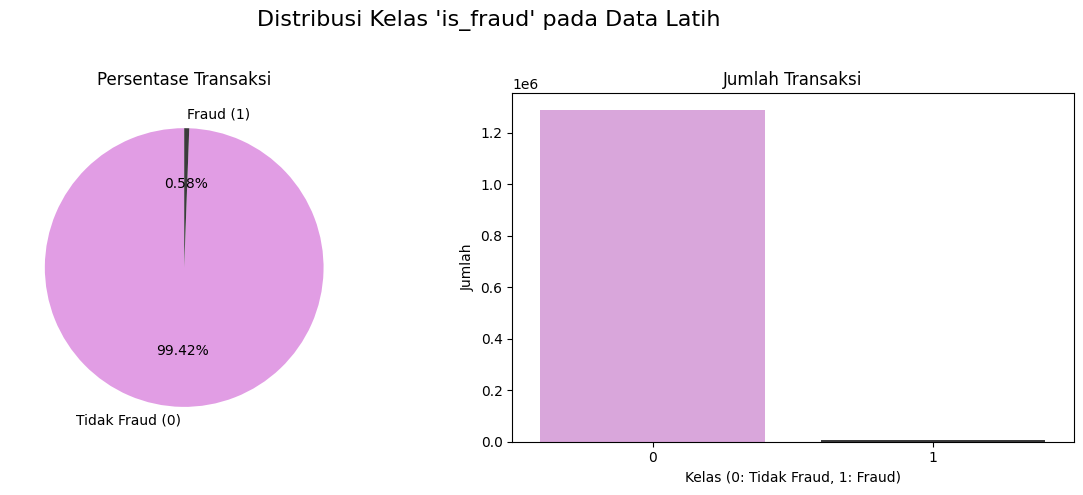

In [2]:
# Memuat dataset latih dan uji
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

print("5 Baris Pertama Data Latih:")
display(train_data.head())

print("\nInformasi Data Latih:")
train_data.info()

print("\nStatistik Deskriptif Data Latih:")
display(train_data.describe())

# Memeriksa nilai yang hilang
print(f"\nJumlah nilai hilang di data latih: {train_data.isnull().sum().sum()}")
print(f"Jumlah nilai hilang di data uji: {test_data.isnull().sum().sum()}")

# Visualisasi Distribusi Kelas Target (is_fraud)
plt.figure(figsize=(12, 5))

# Pie Chart
plt.subplot(1, 2, 1)
fraud_counts = train_data['is_fraud'].value_counts()
plt.pie(fraud_counts, labels=["Tidak Fraud (0)", "Fraud (1)"], autopct="%.2f%%", startangle=90, colors=['#e19de4', '#3B3B3C'])
plt.title("Persentase Transaksi")

# Count Plot
plt.subplot(1, 2, 2)
sns.countplot(x='is_fraud', data=train_data, palette=['#e19de4', '#3B3B3C'], hue='is_fraud', legend=False)
plt.title("Jumlah Transaksi")
plt.xlabel("Kelas (0: Tidak Fraud, 1: Fraud)")
plt.ylabel("Jumlah")

plt.suptitle("Distribusi Kelas 'is_fraud' pada Data Latih", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3. Pra-pemrosesan dan Rekayasa Fitur

Tahap ini mencakup langkah `Pre-processing Data` dari flowchart. Proses ini meliputi ekstraksi fitur dari data tanggal, pemisahan fitur (X) dan target (y), serta pembuatan pipeline pra-pemrosesan untuk menangani variabel numerik dan kategorikal secara terpisah. Penggunaan `Pipeline` dan `ColumnTransformer` memastikan tidak ada kebocoran data (data leakage) dari set uji ke set latih.

### 3.1. Rekayasa dan Pemisahan Fitur

Fitur baru diekstrak dari kolom tanggal untuk menangkap pola temporal. Setelah itu, dataset dibagi menjadi set fitur dan target.

In [3]:
# Fungsi untuk rekayasa fitur dari tanggal
def engineer_features(df):
    df_copy = df.copy()
    # Hapus kolom yang tidak relevan
    cols_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time']
    df_copy = df_copy.drop(columns=cols_to_drop, errors='ignore')
    
    # Konversi dan ekstrak fitur dari tanggal
    df_copy['trans_date_trans_time'] = pd.to_datetime(df_copy['trans_date_trans_time'])
    df_copy['hour'] = df_copy['trans_date_trans_time'].dt.hour
    df_copy['day'] = df_copy['trans_date_trans_time'].dt.day
    df_copy['month'] = df_copy['trans_date_trans_time'].dt.month
    df_copy['day_of_week'] = df_copy['trans_date_trans_time'].dt.dayofweek
    df_copy = df_copy.drop(columns=['trans_date_trans_time'])
    return df_copy

# Terapkan rekayasa fitur
train_processed = engineer_features(train_data)
test_processed = engineer_features(test_data)

# Memisahkan Fitur (X) dan Target (y)
X_train = train_processed.drop('is_fraud', axis=1)
y_train = train_processed['is_fraud']
X_test = test_processed.drop('is_fraud', axis=1)
y_test = test_processed['is_fraud']

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)

Ukuran X_train: (1296675, 13)
Ukuran X_test: (555719, 13)


### 3.2. Correlation Heatmap

Heatmap korelasi dibuat setelah pra-pemrosesan awal untuk menganalisis hubungan antar fitur pada data latih saja.

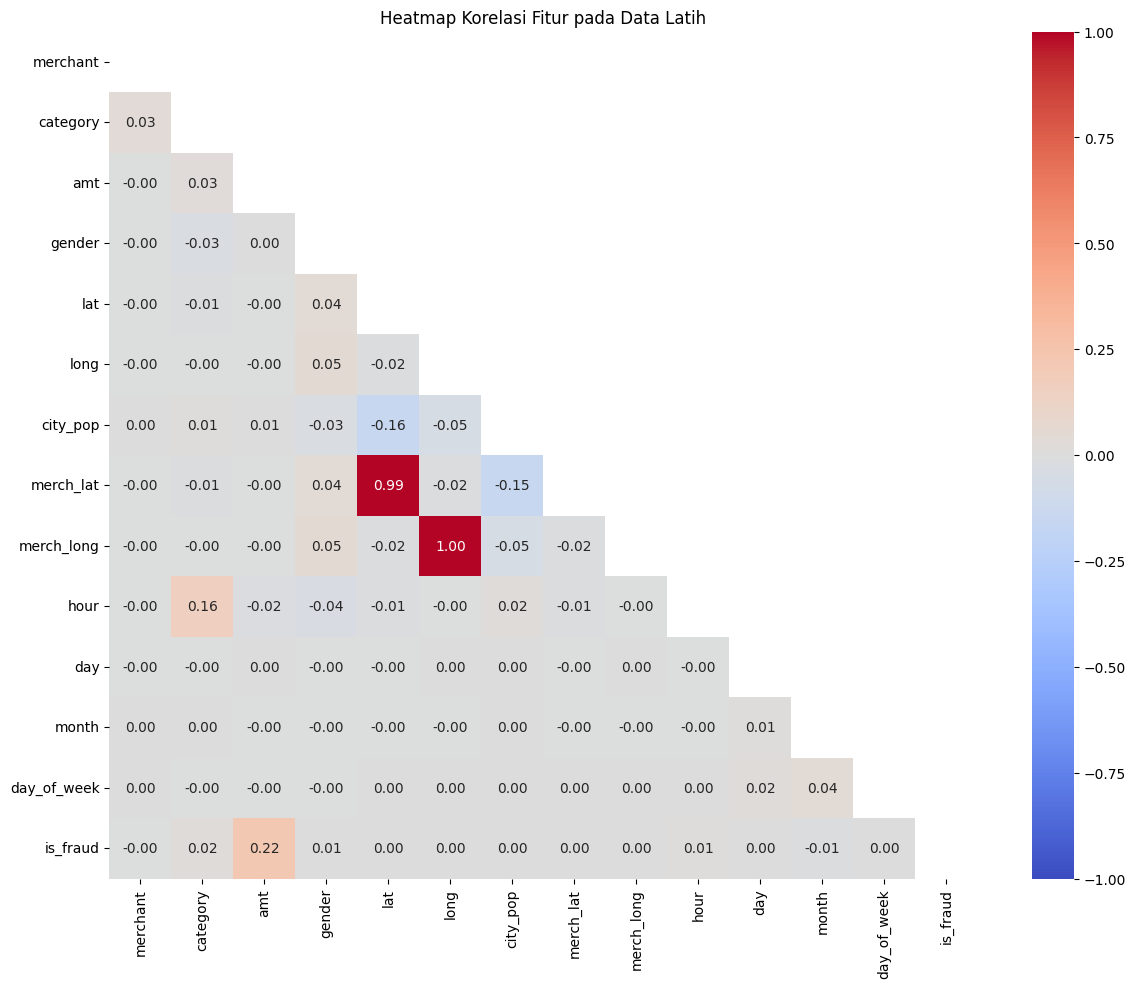

In [4]:
# Membuat heatmap korelasi dari data latih yang sudah diproses
correlation_data = pd.concat([X_train, y_train], axis=1).copy()

# Label Encoding hanya untuk visualisasi heatmap
for col in correlation_data.select_dtypes(include=['object']).columns:
    correlation_data[col] = LabelEncoder().fit_transform(correlation_data[col])

correlation_matrix = correlation_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(14, 11))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Fitur pada Data Latih")
plt.show()

### 3.3. Pipeline Pra-pemrosesan

Untuk efisiensi komputasi, fitur kategorikal diubah menjadi format numerik menggunakan `LabelEncoder`. Selanjutnya, `StandardScaler` diterapkan pada fitur numerik untuk menstandarisasi skalanya. Proses fitting (pembelajaran) dari encoder dan scaler hanya dilakukan pada data latih untuk mencegah kebocoran data (data leakage).

In [5]:
# Identifikasi kolom numerik dan kategorikal
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Buat salinan untuk menghindari SettingWithCopyWarning
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Encoding variabel kategorikal menggunakan LabelEncoder
print("Menerapkan Label Encoding pada fitur kategorikal...")
for col in categorical_cols:
    # Gabungkan data latih dan uji untuk memastikan semua kategori dikenali
    le = LabelEncoder().fit(pd.concat([X_train_processed[col], X_test_processed[col]]))
    
    # Transformasi data latih dan uji secara terpisah
    X_train_processed[col] = le.transform(X_train_processed[col])
    X_test_processed[col] = le.transform(X_test_processed[col])

# Scaling fitur numerik
print("Menerapkan Standard Scaling pada fitur numerik...")
scaler = StandardScaler()

# Fit dan transform HANYA pada data latih
X_train_processed[numerical_cols] = scaler.fit_transform(X_train_processed[numerical_cols])

# Hanya transform pada data uji menggunakan scaler yang sudah di-fit
X_test_processed[numerical_cols] = scaler.transform(X_test_processed[numerical_cols])

print("\nPra-pemrosesan selesai. Data siap untuk pemodelan.")
display(X_train_processed.head())

Menerapkan Label Encoding pada fitur kategorikal...
Menerapkan Standard Scaling pada fitur numerik...

Pra-pemrosesan selesai. Data siap untuk pemodelan.


,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,hour,day,month,day_of_week
0,514,8,-0.407826,0,-0.484420,0.657620,-0.282589,-0.494354,0.593864,-1.878145,-1.652258,-1.504564,-0.941975
1,241,4,0.230039,0,2.039120,-2.033870,-0.293670,2.078699,-2.030341,-1.878145,-1.652258,-1.504564,-0.941975
2,390,0,0.934149,1,0.717754,-1.601537,-0.280406,0.902849,-1.592323,-1.878145,-1.652258,-1.504564,-0.941975
3,360,2,-0.158132,1,1.515617,-1.590766,-0.287742,1.662886,-1.621848,-1.878145,-1.652258,-1.504564,-0.941975
4,297,9,-0.177094,1,-0.023035,0.782279,-0.293835,0.026941,0.841909,-1.878145,-1.652258,-1.504564,-0.941975


## 4. Pemodelan pada Data Tidak Seimbang (Baseline)

Tahap ini sesuai dengan cabang `Balance` pada flowchart. Model-model dilatih pada data asli yang tidak seimbang untuk menetapkan performa dasar (baseline).

### 4.1. Logistic Regression

Melatih model Logistic Regression...


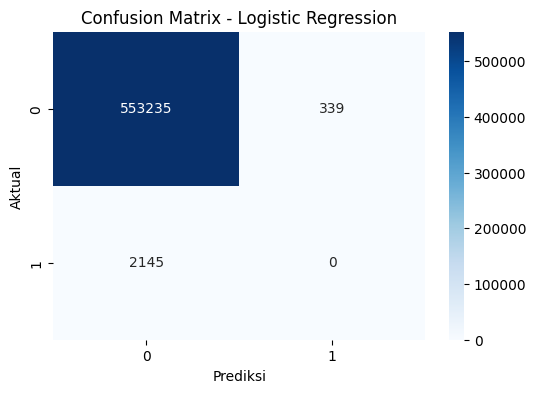

Accuracy Score: 99.55%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [6]:
# Inisialisasi model
model_lr = LogisticRegression(
    n_jobs=-1,
    random_state=42
)

# Latih model pada data latih yang SUDAH DIPROSES
print("Melatih model Logistic Regression...")
model_lr.fit(X_train_processed, y_train)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_lr = model_lr.predict(X_test_processed)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Accuracy Score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy Score: {accuracy_lr*100:.2f}%\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

### 4.2. Decision Tree Classifier

Melatih model Decision Tree...


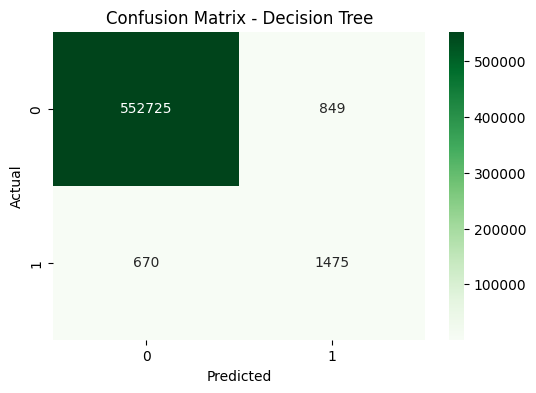

Accuracy Score: 99.73%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.63      0.69      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.84      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [7]:
# Inisialisasi model
model_dt = DecisionTreeClassifier(random_state=42)

# Latih model pada data latih yang SUDAH DIPROSES
print("Melatih model Decision Tree...")
model_dt.fit(X_train_processed, y_train)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_dt = model_dt.predict(X_test_processed)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score: {accuracy_dt*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

### 4.3. Random Forest Classifier

Melatih model Random Forest...


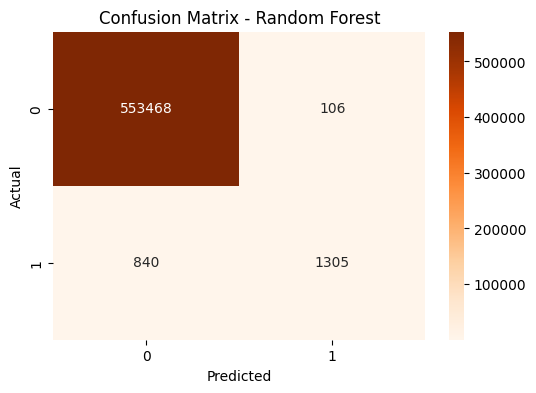

Accuracy Score: 99.83%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.92      0.61      0.73      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.80      0.87    555719
weighted avg       1.00      1.00      1.00    555719



In [8]:
# Inisialisasi model
model_rf = RandomForestClassifier(
    n_estimators=50,
    n_jobs=-1,
    random_state=42
)

# Latih model pada data latih yang SUDAH DIPROSES
print("Melatih model Random Forest...")
model_rf.fit(X_train_processed, y_train)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_rf = model_rf.predict(X_test_processed)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy_rf*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

### 4.4. K-Nearest Neighbors (KNN)

Melatih model K-Nearest Neighbors (proses ini akan lambat)...
Membuat prediksi dengan KNN (proses ini akan sangat lambat)...


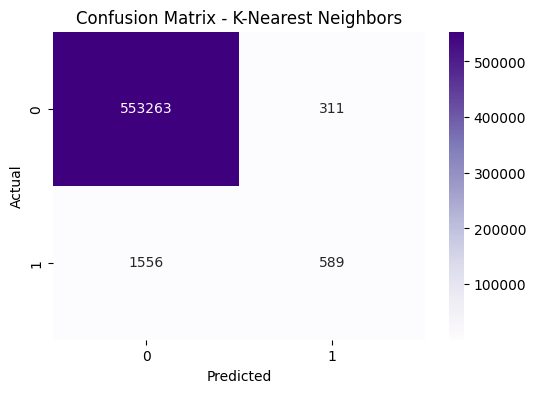

Accuracy Score: 99.66%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.27      0.39      2145

    accuracy                           1.00    555719
   macro avg       0.83      0.64      0.69    555719
weighted avg       1.00      1.00      1.00    555719



In [9]:
# Inisialisasi model
model_knn = KNeighborsClassifier(n_jobs=-1)

# Latih model pada data latih yang SUDAH DIPROSES
print("Melatih model K-Nearest Neighbors (proses ini akan lambat)...")
model_knn.fit(X_train_processed, y_train)

# Buat prediksi pada data uji yang SUDAH DIPROSES
print("Membuat prediksi dengan KNN (proses ini akan sangat lambat)...")
y_pred_knn = model_knn.predict(X_test_processed)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy_knn*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

### 4.5. LightGBM Classifier

Melatih model LightGBM...
[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050


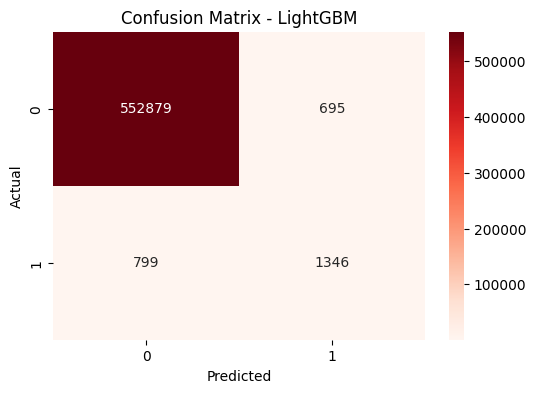

Accuracy Score: 99.73%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.66      0.63      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.83      0.81      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [10]:
# Inisialisasi model
model_lgbm = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1
)

# Latih model pada data latih yang SUDAH DIPROSES
print("Melatih model LightGBM...")
model_lgbm.fit(X_train_processed, y_train)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_lgbm = model_lgbm.predict(X_test_processed)

# Confusion matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy Score: {accuracy_lgbm*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

## 5. Pemodelan pada Data Seimbang (dengan SMOTE)

Tahap ini mengikuti cabang `Unbalance -> Balancing Data Using SMOTE` pada flowchart. Teknik SMOTE diterapkan untuk menyeimbangkan distribusi kelas pada data latih sebelum melatih ulang model.

In [15]:
# Menerapkan SMOTE hanya pada data latih yang SUDAH DIPROSES
print("Menerapkan SMOTE pada data latih...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Ukuran data latih setelah SMOTE:", X_train_resampled.shape)

Menerapkan SMOTE pada data latih...
Ukuran data latih setelah SMOTE: (2578338, 13)


### 5.1. Logistic Regression

Melatih model Logistic Regression setelah SMOTE...


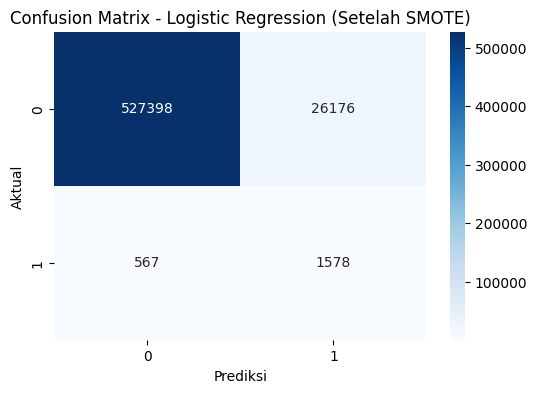

Accuracy Score: 95.19%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.06      0.74      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.54    555719
weighted avg       1.00      0.95      0.97    555719



In [16]:
# Latih model pada data yang telah diseimbangkan
print("Melatih model Logistic Regression setelah SMOTE...")
model_lr.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_lr_smote = model_lr.predict(X_test_processed)

# Confusion Matrix
conf_matrix_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Setelah SMOTE)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Accuracy Score
accuracy_lr_smote = accuracy_score(y_test, y_pred_lr_smote)
print(f"Accuracy Score: {accuracy_lr_smote*100:.2f}%\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_smote))

### 5.2. Decision Tree Classifier

Melatih model Decision Tree setelah SMOTE...


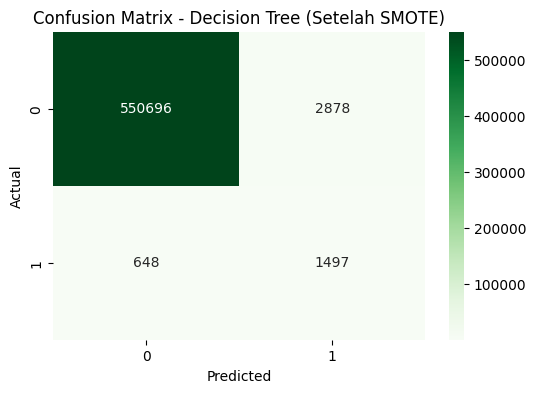

Accuracy Score: 99.37%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.34      0.70      0.46      2145

    accuracy                           0.99    555719
   macro avg       0.67      0.85      0.73    555719
weighted avg       1.00      0.99      0.99    555719



In [17]:
# Latih model pada data yang telah diseimbangkan
print("Melatih model Decision Tree setelah SMOTE...")
model_dt.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_dt_smote = model_dt.predict(X_test_processed)

# Confusion matrix
conf_matrix_dt_smote = confusion_matrix(y_test, y_pred_dt_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt_smote, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree (Setelah SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
print(f"Accuracy Score: {accuracy_dt_smote*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_smote))

### 5.3. Random Forest Classifier

Melatih model Random Forest setelah SMOTE...


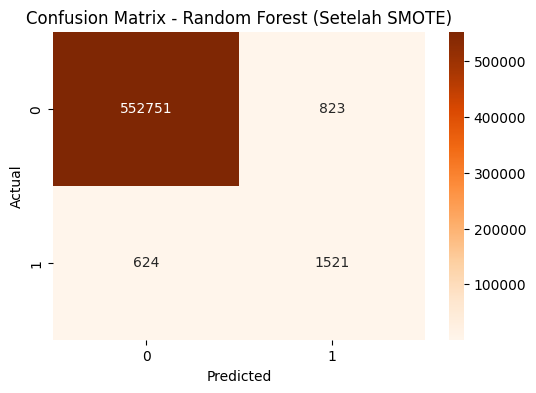

Accuracy Score: 99.74%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.71      0.68      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.85      0.84    555719
weighted avg       1.00      1.00      1.00    555719



In [18]:
# Latih model pada data yang telah diseimbangkan
print("Melatih model Random Forest setelah SMOTE...")
model_rf.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_rf_smote = model_rf.predict(X_test_processed)

# Confusion matrix
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest (Setelah SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
print(f"Accuracy Score: {accuracy_rf_smote*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_smote))

### 5.4. K-Nearest Neighbors (KNN)

Melatih model K-Nearest Neighbors setelah SMOTE (proses ini akan sangat lambat)...
Membuat prediksi dengan KNN setelah SMOTE (proses ini akan sangat lambat)...


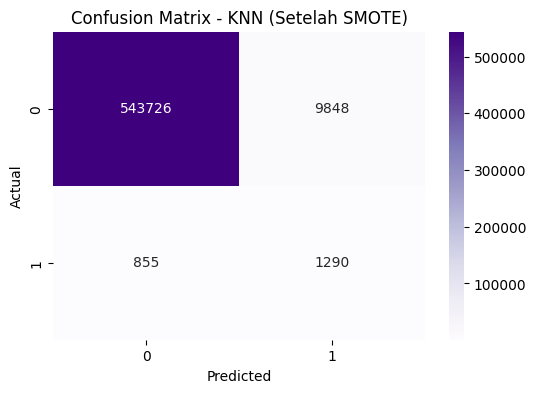

Accuracy Score: 98.07%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.12      0.60      0.19      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.79      0.59    555719
weighted avg       1.00      0.98      0.99    555719



In [19]:
# Latih model pada data yang telah diseimbangkan
print("Melatih model K-Nearest Neighbors setelah SMOTE (proses ini akan sangat lambat)...")
model_knn.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji yang SUDAH DIPROSES
print("Membuat prediksi dengan KNN setelah SMOTE (proses ini akan sangat lambat)...")
y_pred_knn_smote = model_knn.predict(X_test_processed)

# Confusion matrix
conf_matrix_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn_smote, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - KNN (Setelah SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_knn_smote = accuracy_score(y_test, y_pred_knn_smote)
print(f"Accuracy Score: {accuracy_knn_smote*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_smote))

### 5.5. LightGBM Classifier

Melatih model LightGBM setelah SMOTE...
[LightGBM] [Info] Number of positive: 1289169, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 2578338, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


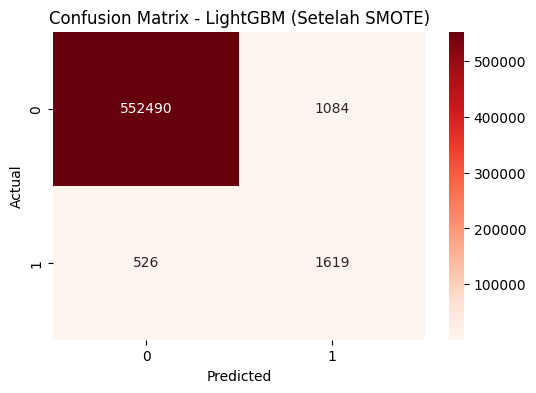

Accuracy Score: 99.71%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.60      0.75      0.67      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.88      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [20]:
# Latih model pada data yang telah diseimbangkan
print("Melatih model LightGBM setelah SMOTE...")
model_lgbm.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji yang SUDAH DIPROSES
y_pred_lgbm_smote = model_lgbm.predict(X_test_processed)

# Confusion matrix
conf_matrix_lgbm_smote = confusion_matrix(y_test, y_pred_lgbm_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lgbm_smote, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - LightGBM (Setelah SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_lgbm_smote = accuracy_score(y_test, y_pred_lgbm_smote)
print(f"Accuracy Score: {accuracy_lgbm_smote*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm_smote))

## 6. Perbandingan Hasil dan Kesimpulan

Sesuai langkah `Results & Evaluation`, semua hasil evaluasi digabungkan dan diurutkan berdasarkan F1-Score untuk mengidentifikasi model dan pendekatan terbaik.

In [21]:
# Membuat list hasil sebelum SMOTE
baseline_results_list = [
    {'Model': 'Logistic Regression', 'Kondisi': 'Sebelum SMOTE', 'Akurasi': accuracy_lr, 'Presisi': precision_score(y_test, y_pred_lr, zero_division=0), 'Recall': recall_score(y_test, y_pred_lr, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_lr, zero_division=0)},
    {'Model': 'Decision Tree', 'Kondisi': 'Sebelum SMOTE', 'Akurasi': accuracy_dt, 'Presisi': precision_score(y_test, y_pred_dt, zero_division=0), 'Recall': recall_score(y_test, y_pred_dt, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_dt, zero_division=0)},
    {'Model': 'Random Forest', 'Kondisi': 'Sebelum SMOTE', 'Akurasi': accuracy_rf, 'Presisi': precision_score(y_test, y_pred_rf, zero_division=0), 'Recall': recall_score(y_test, y_pred_rf, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_rf, zero_division=0)},
    {'Model': 'K-Nearest Neighbors', 'Kondisi': 'Sebelum SMOTE', 'Akurasi': accuracy_knn, 'Presisi': precision_score(y_test, y_pred_knn, zero_division=0), 'Recall': recall_score(y_test, y_pred_knn, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_knn, zero_division=0)},
    {'Model': 'LightGBM', 'Kondisi': 'Sebelum SMOTE', 'Akurasi': accuracy_lgbm, 'Presisi': precision_score(y_test, y_pred_lgbm, zero_division=0), 'Recall': recall_score(y_test, y_pred_lgbm, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_lgbm, zero_division=0)}
]

# Membuat list hasil setelah SMOTE
smote_results_list = [
    {'Model': 'Logistic Regression', 'Kondisi': 'Setelah SMOTE', 'Akurasi': accuracy_lr_smote, 'Presisi': precision_score(y_test, y_pred_lr_smote, zero_division=0), 'Recall': recall_score(y_test, y_pred_lr_smote, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_lr_smote, zero_division=0)},
    {'Model': 'Decision Tree', 'Kondisi': 'Setelah SMOTE', 'Akurasi': accuracy_dt_smote, 'Presisi': precision_score(y_test, y_pred_dt_smote, zero_division=0), 'Recall': recall_score(y_test, y_pred_dt_smote, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_dt_smote, zero_division=0)},
    {'Model': 'Random Forest', 'Kondisi': 'Setelah SMOTE', 'Akurasi': accuracy_rf_smote, 'Presisi': precision_score(y_test, y_pred_rf_smote, zero_division=0), 'Recall': recall_score(y_test, y_pred_rf_smote, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_rf_smote, zero_division=0)},
    {'Model': 'K-Nearest Neighbors', 'Kondisi': 'Setelah SMOTE', 'Akurasi': accuracy_knn_smote, 'Presisi': precision_score(y_test, y_pred_knn_smote, zero_division=0), 'Recall': recall_score(y_test, y_pred_knn_smote, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_knn_smote, zero_division=0)},
    {'Model': 'LightGBM', 'Kondisi': 'Setelah SMOTE', 'Akurasi': accuracy_lgbm_smote, 'Presisi': precision_score(y_test, y_pred_lgbm_smote, zero_division=0), 'Recall': recall_score(y_test, y_pred_lgbm_smote, zero_division=0), 'F1-Score': f1_score(y_test, y_pred_lgbm_smote, zero_division=0)}
]

# Gabungkan hasil dan urutkan
final_evaluation_df = pd.DataFrame(baseline_results_list + smote_results_list)
final_evaluation_sorted = final_evaluation_df.sort_values(by='F1-Score', ascending=False)

# Format nilai numerik menjadi dua desimal
formatted_df = final_evaluation_sorted.style.format({
    'Akurasi': '{:.2f}', 'Presisi': '{:.2f}', 'Recall': '{:.2f}', 'F1-Score': '{:.2f}'
})

print("\n--- Tabel Matriks Evaluasi Model (Diurutkan Berdasarkan F1-Score) ---")
display(formatted_df)


--- Tabel Matriks Evaluasi Model (Diurutkan Berdasarkan F1-Score) ---


,Model,Kondisi,Akurasi,Presisi,Recall,F1-Score
2,Random Forest,Sebelum SMOTE,1.00,0.92,0.61,0.73
7,Random Forest,Setelah SMOTE,1.00,0.65,0.71,0.68
9,LightGBM,Setelah SMOTE,1.00,0.60,0.75,0.67
1,Decision Tree,Sebelum SMOTE,1.00,0.63,0.69,0.66
4,LightGBM,Sebelum SMOTE,1.00,0.66,0.63,0.64
6,Decision Tree,Setelah SMOTE,0.99,0.34,0.70,0.46
3,K-Nearest Neighbors,Sebelum SMOTE,1.00,0.65,0.27,0.39
8,K-Nearest Neighbors,Setelah SMOTE,0.98,0.12,0.60,0.19
5,Logistic Regression,Setelah SMOTE,0.95,0.06,0.74,0.11
0,Logistic Regression,Sebelum SMOTE,1.00,0.00,0.00,0.00


## 7. Analisis Mendalam pada Model Terbaik

Tahap ini merupakan bagian akhir dari `Results & Evaluation`. Model dengan performa terbaik akan dianalisis lebih lanjut, termasuk tingkat kepentingan fiturnya dan karakteristik transaksi yang diprediksi sebagai penipuan.

### 7.1. Feature Importance

Menganalisis fitur mana yang paling berpengaruh bagi model terbaik dalam membuat prediksi.

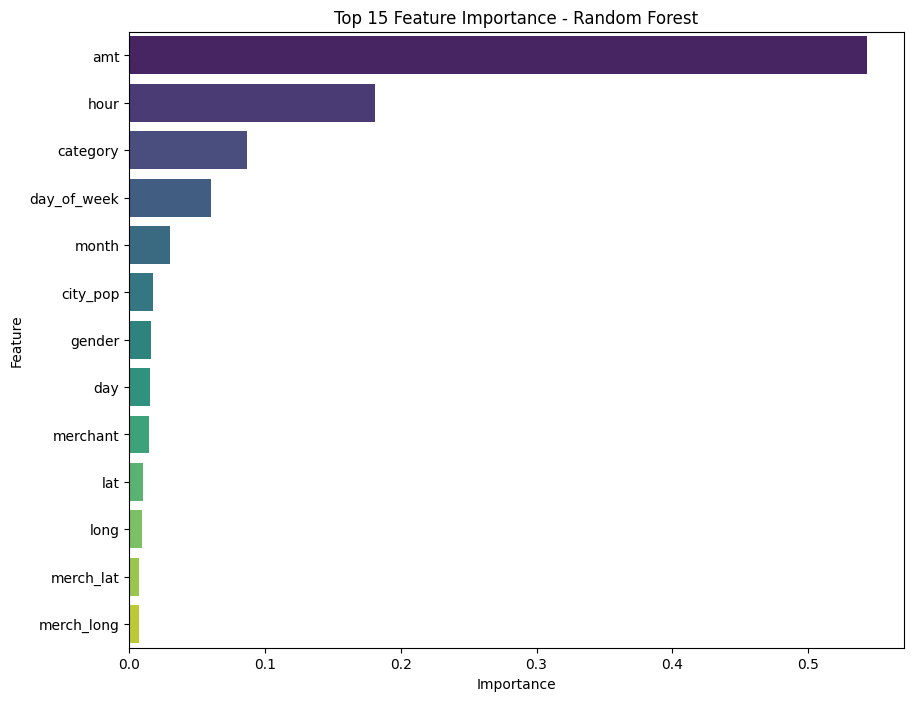

In [22]:
# Identifikasi model terbaik dari tabel evaluasi
best_model_info = final_evaluation_sorted.iloc[0]
best_model_name = best_model_info['Model']

# Dictionary untuk memetakan nama model ke objek model
all_models = {
    'Logistic Regression': model_lr,
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'K-Nearest Neighbors': model_knn,
    'LightGBM': model_lgbm
}

best_model_object = all_models[best_model_name]

# Latih ulang model terbaik pada data SMOTE untuk mendapatkan feature importance yang relevan
best_model_object.fit(X_train_resampled, y_train_resampled)

# Ekstraksi dan visualisasi feature importance
if hasattr(best_model_object, 'feature_importances_'):
    importances = best_model_object.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.show()
else:
    print(f"Model {best_model_name} tidak mendukung feature importance secara langsung.")

### 7.2. Analisis Transaksi yang Diprediksi Penipuan

Mengidentifikasi dan menganalisis karakteristik umum dari transaksi yang berhasil ditandai sebagai penipuan oleh model terbaik.


Jumlah transaksi yang diprediksi sebagai penipuan: 2344
Contoh data yang diprediksi sebagai penipuan:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,predicted_is_fraud
1044,1044,2020-06-21 18:08:47,4302480582202074,"fraud_Towne, Greenholt and Koepp",shopping_net,981.92,David,Rodriguez,M,821 Solis Points,...,-86.2492,128715,Historic buildings inspector/conservation officer,1995-05-25,3b1e799de5fa593a74b851b9d5f8bbe1,1371838127,43.849101,-85.560458,0,1
1695,1695,2020-06-21 22:09:41,4427805710168,fraud_Lebsack and Sons,misc_net,890.22,Michelle,Rodriguez,F,1742 Brandon Squares Apt. 461,...,-105.6933,8874,Licensed conveyancer,2000-08-16,670e9fd071e3745d6d90b5ee5f29c64c,1371852581,34.154798,-106.551531,0,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,1



Data penipuan yang diprediksi berhasil disimpan ke 'predicted_fraud_records.csv'


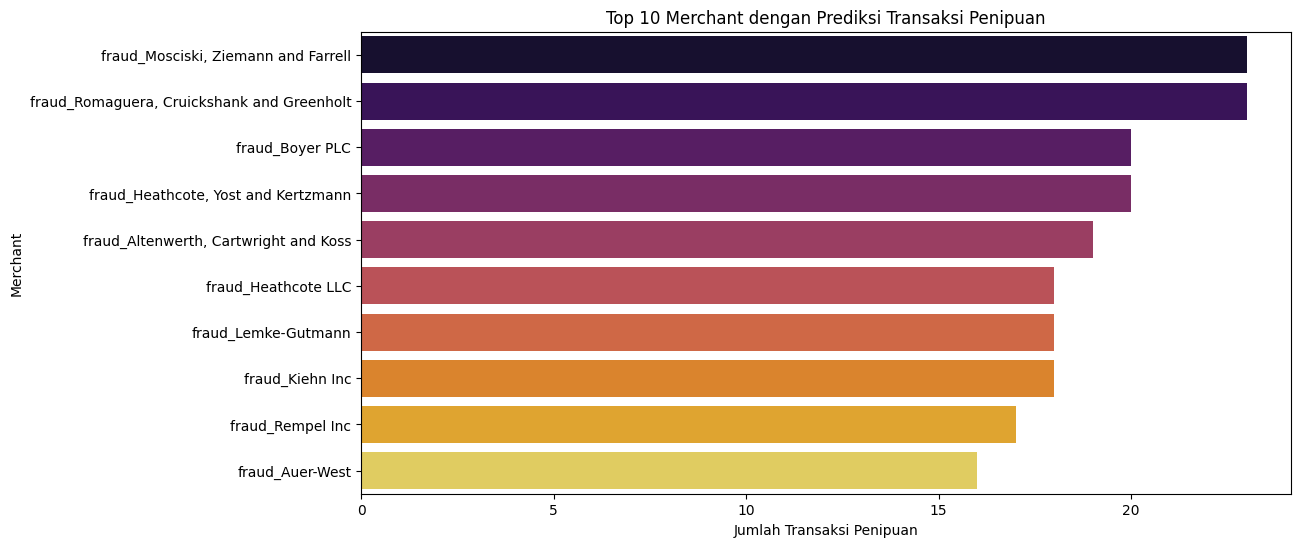

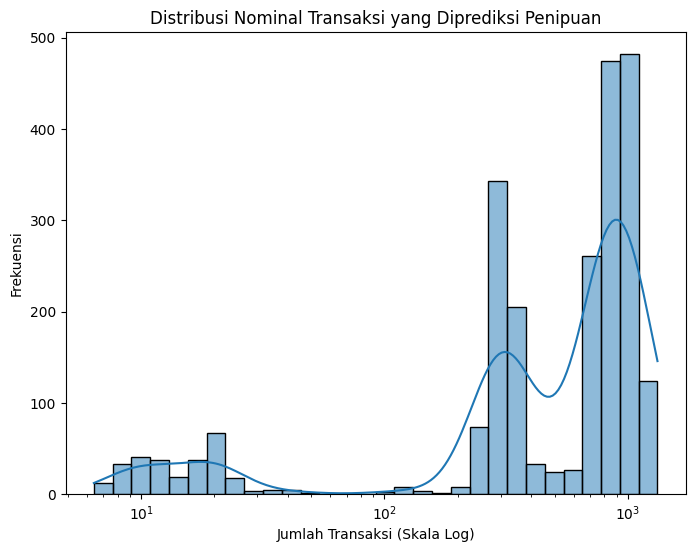

In [24]:
# Membuat prediksi dengan model terbaik pada data uji yang SUDAH DIPROSES
y_pred_best = best_model_object.predict(X_test_processed)

# Menambahkan hasil prediksi ke data uji asli untuk interpretasi
test_data_with_pred = test_data.copy()
test_data_with_pred['predicted_is_fraud'] = y_pred_best

# Filter dan tampilkan data yang diprediksi sebagai penipuan
predicted_fraud_records = test_data_with_pred[test_data_with_pred['predicted_is_fraud'] == 1]

print(f"\nJumlah transaksi yang diprediksi sebagai penipuan: {len(predicted_fraud_records)}")
print("Contoh data yang diprediksi sebagai penipuan:")
display(predicted_fraud_records.head())

# Menyimpan hasil ke file CSV
predicted_fraud_records.to_csv('predicted_fraud_records.csv', index=False)
print("\nData penipuan yang diprediksi berhasil disimpan ke 'predicted_fraud_records.csv'")

# Visualisasi Top Merchant terkait penipuan
plt.figure(figsize=(12, 6))
sns.countplot(data=predicted_fraud_records, y='merchant', order=predicted_fraud_records['merchant'].value_counts().index[:10], palette='inferno')
plt.title('Top 10 Merchant dengan Prediksi Transaksi Penipuan')
plt.xlabel('Jumlah Transaksi Penipuan')
plt.ylabel('Merchant')
plt.show()

# Visualisasi Distribusi Nominal Transaksi Penipuan
plt.figure(figsize=(8, 6))
sns.histplot(data=predicted_fraud_records, x='amt', bins=30, kde=True, log_scale=True)
plt.title('Distribusi Nominal Transaksi yang Diprediksi Penipuan')
plt.xlabel('Jumlah Transaksi (Skala Log)')
plt.ylabel('Frekuensi')
plt.show()